<a href="https://colab.research.google.com/github/ssudhakar165/colab/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b archive https://github.com/ultralytics/yolov3



Cloning into 'yolov3'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9711 (delta 0), reused 2 (delta 0), pack-reused 9708
Receiving objects: 100% (9711/9711), 8.24 MiB | 32.19 MiB/s, done.
Resolving deltas: 100% (6622/6622), done.


This is old method with cfg file in yolov3 folder. current method doe not have the cfg. But have YAML

In [2]:
%cd yolov3


/content/yolov3


Down load yolov3.cfg. Chage:-formula for filters = (classes+5)*3. there are three places filter values and classes need to be changed. save in disk and upload in colab

In [3]:
%mv /content/yolov3.cfg /content/yolov3/cfg/yolov3.cfg

Shift to yolov3 folder.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/pascal.zip'

Archive:  /content/drive/MyDrive/pascal.zip
  inflating: train.csv               
  inflating: val.csv                 
  inflating: train_images/2007_000027.jpg  
  inflating: train_images/2007_000032.jpg  
  inflating: train_images/2007_000033.jpg  
  inflating: train_images/2007_000039.jpg  
  inflating: train_images/2007_000042.jpg  
  inflating: train_images/2007_000061.jpg  
  inflating: train_images/2007_000063.jpg  
  inflating: train_images/2007_000068.jpg  
  inflating: train_images/2007_000121.jpg  
  inflating: train_images/2007_000123.jpg  
  inflating: train_images/2007_000129.jpg  
  inflating: train_images/2007_000170.jpg  
  inflating: train_images/2007_000175.jpg  
  inflating: train_images/2007_000187.jpg  
  inflating: train_images/2007_000241.jpg  
  inflating: train_images/2007_000243.jpg  
  inflating: train_images/2007_000250.jpg  
  inflating: train_images/2007_000256.jpg  
  inflating: train_images/2007_000272.jpg  
  inflating: train_images/2007_000323.jpg  


In [6]:
import numpy as np
import pandas as pd

from PIL import Image

In [7]:
train= pd.read_csv('train.csv')

In [8]:
train.head()

,filename,class,xmin,xmax,ymin,ymax
0,2007_000027.jpg,person,174,349,101,351
1,2007_000032.jpg,aeroplane,104,375,78,183
2,2007_000032.jpg,aeroplane,133,197,88,123
3,2007_000032.jpg,person,195,213,180,229
4,2007_000032.jpg,person,26,44,189,238


In [9]:
train['class']= train['class'].replace({'person':0,'chair': 1, 'car':2, 'bottle':3, 'pottedplant':4,'dog':5,'boat':6, 'bird':7})

Please  start numbering from 0. Here I have taken 8 classes and numbered 0-7 not 1-8 ( not accpeted by the model)

In [10]:
train['class'].value_counts()

0              1749
1               298
2               275
3               162
4               156
5               126
6               124
7               102
sheep            99
cat              98
tvmonitor        98
sofa             93
cow              92
motorbike        87
horse            86
bicycle          80
aeroplane        76
diningtable      71
train            63
bus              57
Name: class, dtype: int64

In [11]:
train= train.loc[ (train['class']==0)|(train['class']==2)|(train['class']==3)|(train['class']==4)|(train['class']==5)|(train['class']==6)|(train['class']==7)|(train['class']==1)]

In [12]:
train['class'].value_counts()

0    1749
1     298
2     275
3     162
4     156
5     126
6     124
7     102
Name: class, dtype: int64

In [13]:
!mkdir labels


In [14]:
for image_name in train.filename.unique():

    # separate labels for each image
    image_metadata = train[train.filename == image_name].copy()

    # x-center, y-center, height and width for bounding box
    image_metadata['x_center'] = (image_metadata['xmax'] + image_metadata['xmin']) / 2
    image_metadata['y_center'] = (image_metadata['ymax'] + image_metadata['ymin']) / 2
    image_metadata['width'] = (image_metadata['xmax'] - image_metadata['xmin'])
    image_metadata['height'] = (image_metadata['ymax'] - image_metadata['ymin'])

    im_width, im_height = Image.open('train_images/' + image_name).size

    # normalizing bounding box values
    image_metadata['x_center'] = image_metadata['x_center']/im_width
    image_metadata['width'] = image_metadata['width']/im_width
    image_metadata['y_center'] = image_metadata['y_center']/im_height
    image_metadata['height'] = image_metadata['height']/im_height

    image_metadata[['class', 'x_center', 'y_center', 'width', 'height']].to_csv('labels/' + image_name.split('.')[0] + '.txt', index=False, header=None, sep=" ")

In [15]:
pascalDet_train = train.filename.apply(lambda x: '/content/yolov3/images/' + x).unique()
np.savetxt("pascalDet_train.txt", pascalDet_train, fmt="%s")

In [16]:
!cat pascalDet_train.txt

/content/yolov3/images/2007_000027.jpg
/content/yolov3/images/2007_000032.jpg
/content/yolov3/images/2007_000061.jpg
/content/yolov3/images/2007_000063.jpg
/content/yolov3/images/2007_000068.jpg
/content/yolov3/images/2007_000129.jpg
/content/yolov3/images/2007_000170.jpg
/content/yolov3/images/2007_000241.jpg
/content/yolov3/images/2007_000250.jpg
/content/yolov3/images/2007_000272.jpg
/content/yolov3/images/2007_000323.jpg
/content/yolov3/images/2007_000346.jpg
/content/yolov3/images/2007_000363.jpg
/content/yolov3/images/2007_000364.jpg
/content/yolov3/images/2007_000392.jpg
/content/yolov3/images/2007_000423.jpg
/content/yolov3/images/2007_000452.jpg
/content/yolov3/images/2007_000480.jpg
/content/yolov3/images/2007_000504.jpg
/content/yolov3/images/2007_000515.jpg
/content/yolov3/images/2007_000529.jpg
/content/yolov3/images/2007_000559.jpg
/content/yolov3/images/2007_000629.jpg
/content/yolov3/images/2007_000645.jpg
/content/yolov3/images/2007_000648.jpg
/content/yolov3/images/20

In [17]:

pascalDet_val = train.filename.apply(lambda x: '/content/yolov3/images/' + x).unique()
np.savetxt("pascalDet_val.txt", pascalDet_val, fmt="%s")

In [18]:
!cat pascalDet_val.txt

/content/yolov3/images/2007_000027.jpg
/content/yolov3/images/2007_000032.jpg
/content/yolov3/images/2007_000061.jpg
/content/yolov3/images/2007_000063.jpg
/content/yolov3/images/2007_000068.jpg
/content/yolov3/images/2007_000129.jpg
/content/yolov3/images/2007_000170.jpg
/content/yolov3/images/2007_000241.jpg
/content/yolov3/images/2007_000250.jpg
/content/yolov3/images/2007_000272.jpg
/content/yolov3/images/2007_000323.jpg
/content/yolov3/images/2007_000346.jpg
/content/yolov3/images/2007_000363.jpg
/content/yolov3/images/2007_000364.jpg
/content/yolov3/images/2007_000392.jpg
/content/yolov3/images/2007_000423.jpg
/content/yolov3/images/2007_000452.jpg
/content/yolov3/images/2007_000480.jpg
/content/yolov3/images/2007_000504.jpg
/content/yolov3/images/2007_000515.jpg
/content/yolov3/images/2007_000529.jpg
/content/yolov3/images/2007_000559.jpg
/content/yolov3/images/2007_000629.jpg
/content/yolov3/images/2007_000645.jpg
/content/yolov3/images/2007_000648.jpg
/content/yolov3/images/20

In [19]:
with open('pascalDet.names', 'w') as f:
    f.write('Person\nChair\nCar\nBottle\nPottleplant\nDog\nBoat\nBird')
    

In [20]:
!cat pascalDet.names

Person
Chair
Car
Bottle
Pottleplant
Dog
Boat
Bird

In [21]:
with open('pascalDet.data', 'w') as f:
    f.write('classes=8\ntrain=/content/yolov3/pascalDet_train.txt\nvalid=/content/yolov3/pascalDet_val.txt\nnames=/content/yolov3/pascalDet.names')

In [22]:
!cat pascalDet.data

classes=8
train=/content/yolov3/pascalDet_train.txt
valid=/content/yolov3/pascalDet_val.txt
names=/content/yolov3/pascalDet.names

images should be in image folder. here it was train_images. changed the folder name.

In [23]:
!python3 /content/yolov3/train.py --weights yolov3.pt --cfg yolov3.cfg --data /content/yolov3/pascalDet.data --img-size 320 --epochs 15 

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./cfg/yolov3.cfg', data='/content/yolov3/pascalDet.data', device='', epochs=15, evolve=False, freeze_layers=False, img_size=[320], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2021-01-28 07:14:58.268598: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.15614e+07 parameters, 6.15614e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  

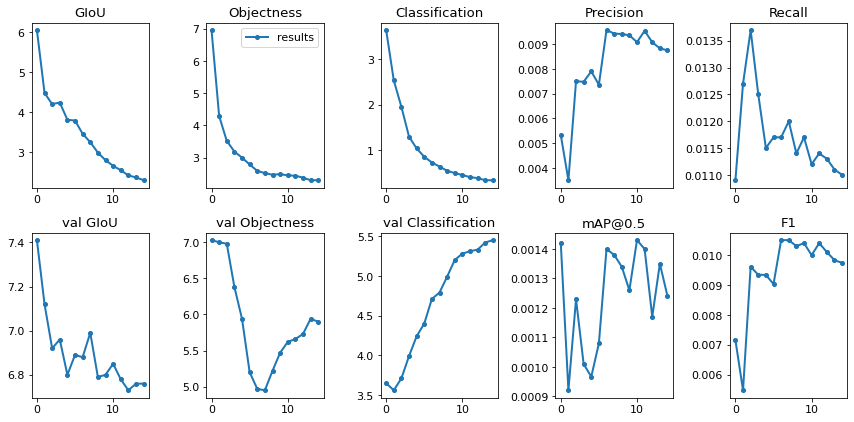

In [24]:
from utils import utils
utils.plot_results()

In [36]:
!cp val_images/2008_002470.jpg data/samples/

In [37]:
!python3 detect.py --weights "weights/best.pt" --cfg "cfg/yolov3.cfg" --names "pascalDet.names"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='pascalDet.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 222 layers, 6.15614e+07 parameters, 6.15614e+07 gradients
image 1/7 data/samples/2007_000032.jpg: 288x512 1 Persons, Done. (0.030s)
image 2/7 data/samples/2007_009253.jpg: 416x512 1 Persons, Done. (0.030s)
image 3/7 data/samples/2008_001436.jpg: 352x512 Done. (0.026s)
image 4/7 data/samples/2008_001488.jpg: 352x512 Done. (0.026s)
image 5/7 data/samples/2008_002470.jpg: 352x512 6 Persons, Done. (0.026s)
image 6/7 data/samples/bus.jpg: 512x384 3 Persons, Done. (0.027s)
image 7/7 data/samples/zidane.jpg: 288x512 1 Persons, Done. (0.016s)
Results saved to /content/yolov3/output
Done. (0.354s)


pl check the output folder